In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report

# ***Reading the csv file***


In [0]:
data=pd.read_csv('/content/drive/My Drive/BOLD_L2/final assignment/BankCustomerChurn.csv')

In [0]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Dropping row number and surname as there is no need o**f **them** 

In [0]:
data.drop('RowNumber', axis=1, inplace=True)

In [0]:
data.drop('Surname', axis=1, inplace=True)

In [0]:
data.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## **WE ARE CONVERTING CERTAIN COLUMNS INTO CATEGORICAL**

In [0]:
for col in ['Geography', 'Gender','NumOfProducts','Tenure']:
    data[col] = data[col].astype('category')

In [0]:
data.shape
data.dtypes

CustomerId            int64
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure             category
Balance             float64
NumOfProducts      category
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [0]:
data.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

HERE THERE ARE NO NULL VALUES

In [0]:
data.describe(include='all')

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.0,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,11.0,NaN,4.0,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,1048.0,NaN,5084.0,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,NaN,76485.889288,NaN,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,NaN,62397.405202,NaN,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,NaN,0.000000,NaN,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,NaN,0.000000,NaN,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,NaN,97198.540000,NaN,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,NaN,127644.240000,NaN,1.00000,1.000000,149388.247500,0.000000


HERE MAX VALUE OF AGE IS 92.
WE ARE DROPPING THE VALUES WHOSE AGE IS 92

In [0]:
data1=data.loc[(data['Age']!=92)]

In [0]:
data1.describe(include='all')

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.998000e+03,9998.000000,9998,9998,9998.000000,9998.0,9998.000000,9998.0,9998.000000,9998.000000,9998.000000,9998.000000
unique,NaN,NaN,3,2,NaN,11.0,NaN,4.0,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,5012,5455,NaN,1048.0,NaN,5083.0,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.513103,NaN,NaN,38.911182,NaN,76476.425618,NaN,0.705541,0.515003,100087.257250,0.203741
std,7.193895e+04,96.655997,NaN,NaN,10.461948,NaN,62400.049724,NaN,0.455822,0.499800,57504.569397,0.402799
min,1.556570e+07,350.000000,NaN,NaN,18.000000,NaN,0.000000,NaN,0.000000,0.000000,11.580000,0.000000
25%,1.562852e+07,584.000000,NaN,NaN,32.000000,NaN,0.000000,NaN,0.000000,0.000000,51012.472500,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,NaN,97173.290000,NaN,1.000000,1.000000,100193.915000,0.000000
75%,1.575323e+07,717.750000,NaN,NaN,44.000000,NaN,127647.840000,NaN,1.000000,1.000000,149383.652500,0.000000


**DATA VISUALIZATIONS**

TO FIND CORRRELATIONS BETWEEN NUMERIC ATTRIBUTES

In [0]:
numeric = data.select_dtypes(include=['float64'] and ['int64']).columns
numeric

Index(['CustomerId', 'CreditScore', 'Age', 'HasCrCard', 'IsActiveMember',
       'Exited'],
      dtype='object')

In [0]:
data[numeric].corr()

,CustomerId,CreditScore,Age,HasCrCard,IsActiveMember,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014025,0.001665,-0.006248
CreditScore,0.005308,1.000000,-0.003965,-0.005458,0.025651,-0.027094
Age,0.009497,-0.003965,1.000000,-0.011721,0.085472,0.285323
HasCrCard,-0.014025,-0.005458,-0.011721,1.000000,-0.011866,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.011866,1.000000,-0.156128
Exited,-0.006248,-0.027094,0.285323,-0.007138,-0.156128,1.000000


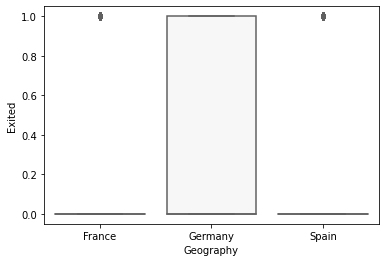

In [0]:
sns.boxplot(x="Geography", y="Exited", data=data, palette="PRGn")
plt.show()

BY THIS WE CAN INFER PEOPLE OF AREA GERMANY ARE EXITING MORE

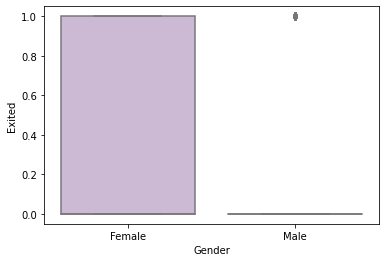

In [0]:
sns.boxplot(x="Gender", y="Exited", data=data, palette="PRGn")
plt.show()

THAN MALE FEMALE EXITS ARE MORE

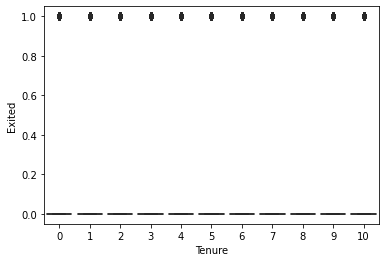

In [0]:
sns.boxplot(x="Tenure", y="Exited", data=data, palette="PRGn")
plt.show()

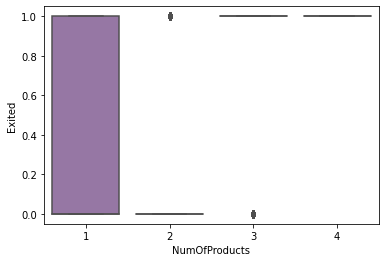

In [0]:
sns.boxplot(x="NumOfProducts", y="Exited", data=data, palette="PRGn")
plt.show()

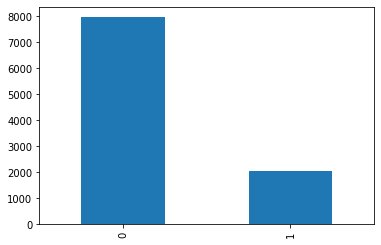

In [0]:

data['Exited'].value_counts().plot(kind='bar')

**WE NEED TO DUMMIFICATION**

In [0]:
cols=['Geography', 'Gender','NumOfProducts','Tenure']
data=pd.get_dummies(columns=cols,data=data,drop_first=True)

### HERE WE ARE DIVIDING THE DATA INTO TRAIN AND TEST

In [0]:
X, y = data.loc[:,data.columns!='Exited'], data.loc[:,'Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### WE ARE BULDING A DECISION TREE WITH MAX DEPTH 2

In [0]:
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)

In [0]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
clf.feature_importances_

array([0.        , 0.        , 0.5591694 , 0.        , 0.        ,
       0.27181061, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16901999, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [0]:
np.argsort(clf.feature_importances_)

array([ 0, 20, 19, 18, 17, 16, 15, 14, 13, 12, 21, 22,  9,  8,  7,  6,  4,
        3,  1, 10, 11,  5,  2])

In [0]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,Age,IsActiveMember,NumOfProducts_3,NumOfProducts_2,CreditScore,Balance,HasCrCard,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Tenure_10,Tenure_9,NumOfProducts_4,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,CustomerId
1,0.559169,0.271811,0.16902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def plottree(m1):
    labels=X.columns
    graph = Source(export_graphviz(m1, out_file=None,feature_names=labels, class_names=['No', 'Yes',] ,filled = True))
    display(SVG(graph.pipe(format='svg')))

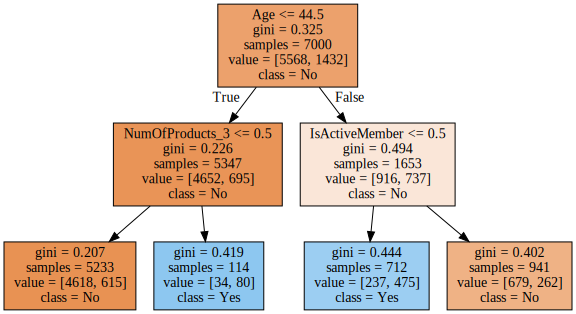

In [0]:
plottree(clf)

In [0]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

### FINDING THE CONFUSION MATRIX

In [0]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[5297  271]
 [ 877  555]]
[[2296   99]
 [ 371  234]]


### ERROR METRIC IS RECALL

In [0]:
recall_Train=(confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]))
recall_Train

0.9513290229885057

In [0]:
recall_Test=(confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]))
recall_Test

0.9586638830897704

In [0]:
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2395
           1       0.70      0.39      0.50       605

    accuracy                           0.84      3000
   macro avg       0.78      0.67      0.70      3000
weighted avg       0.83      0.84      0.82      3000



### HERE WE ARE BALANCING THE CLASS AS NEGATIVE RATE IS MORE THAN POSITIVE RATE

In [0]:
clf = DecisionTreeClassifier(class_weight='balanced')
clf = clf.fit(X_train, y_train)

In [0]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [0]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[5568    0]
 [   0 1432]]
[[2090  305]
 [ 304  301]]


In [0]:
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2395
           1       0.50      0.50      0.50       605

    accuracy                           0.80      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.80      0.80      0.80      3000

